In [84]:
import pandas as pd

In [85]:
df = pd.read_csv('customers.csv')

In [86]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [87]:
import matplotlib.pyplot as plt

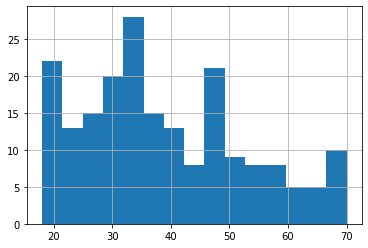

In [88]:
df['Age'].hist(bins=15);

In [89]:
df.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

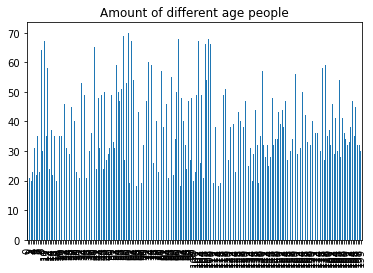

In [90]:
df['Age'].plot(kind='bar', title='Amount of different age people');

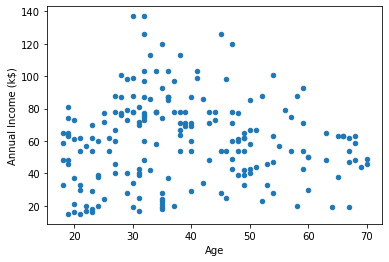

In [91]:
df.plot(x='Age', y='Annual Income (k$)', kind='scatter');

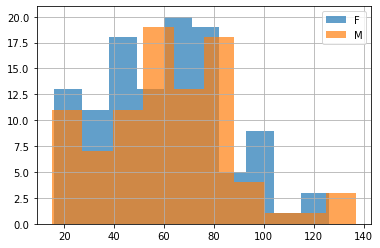

In [92]:
df[df['Gender'] == "Female"]['Annual Income (k$)'].hist(alpha=0.7)
df[df['Gender'] == "Male"]['Annual Income (k$)'].hist(alpha=0.7)
plt.legend(['F', 'M']);

In [93]:
a = df.groupby(['Age', 'Gender'])['Annual Income (k$)'].sum()

In [94]:
a

Age  Gender
18   Female     65
     Male      140
19   Female    128
     Male      328
20   Female     53
              ... 
67   Male      135
68   Female    107
     Male       63
69   Male       44
70   Male       95
Name: Annual Income (k$), Length: 87, dtype: int64

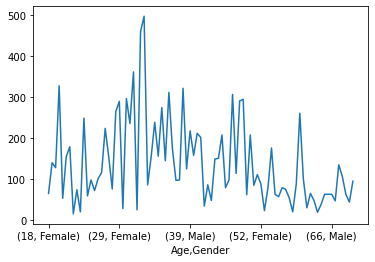

In [95]:
a.plot();

# Missing values

In [96]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [97]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [98]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [99]:
#remove missing values
df.dropna();

In [100]:
# NaN -> 0
df.fillna(0);

# Creating DataFrames

In [101]:
list_of_dict = [
    {'name': 'Ginger', 'breed': 'Dachshund', 'height_cm': 22,
    'weight_kg': 10, 'date_of_birth': '2019-03-14'},
    {'name': 'Scout', 'breed': 'Dalmatain', 'height_cm': 59,
    'weight_kg': 25, 'date_of_birth': '2019-05-09'}
]

In [102]:
dogs_list = pd.DataFrame(list_of_dict)

In [103]:
dogs_list

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatain,59,25,2019-05-09


In [104]:
dict_of_list = {
    'name': ['Ginger', 'Scout'],
    'breed': ['Dachshund', 'Dalmatain'],
    'height': [22, 59],
    'weight': [10, 25],
    'date_of_birth': ['2019-03-04', '2019-05-09']
}

In [105]:
dogs_dict = pd.DataFrame(dict_of_list)

In [106]:
dogs_dict

,name,breed,height,weight,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-04
1,Scout,Dalmatain,59,25,2019-05-09


# Reading and writing CSVs

### Creating CSV with Python

In [107]:
columns = ['name', 'breed', 'height', 'weight', 'd_o_b']
data = [
    ['Ginger','Labrador',22,10,'2019-03-04'],
    ['Scout','Alabay',59,25,'2019-05-09']
]

In [108]:
import os
os.path.abspath('jupyter/customers.csv')

'/Users/sergejloginov/work/2021-2022/da_train/jupyter/4_join_pandas/jupyter/customers.csv'

In [109]:
import csv
with open('dogs.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    writer.writerows(data)

In [110]:
new_dogs = pd.read_csv('dogs.csv')

In [111]:
new_dogs

,name,breed,height,weight,d_o_b
0,Ginger,Labrador,22,10,2019-03-04
1,Scout,Alabay,59,25,2019-05-09


In [112]:
 new_dogs['bmi'] = new_dogs['weight'] / (new_dogs['height'] / 100) ** 2

In [113]:
new_dogs

,name,breed,height,weight,d_o_b,bmi
0,Ginger,Labrador,22,10,2019-03-04,206.611570
1,Scout,Alabay,59,25,2019-05-09,71.818443


In [114]:
new_dogs.to_csv('new_dogs.csv')

# Inner join
### Возвращаются строки данных с совпадающими значениями в ключевых столбцах обеих таблиц

In [115]:
import numpy as np
c = ['CustomerID', 'Study level', 'Age']
d = []
for i in range(200):
    d.append([i+1, np.random.randint(0,6), np.random.randint(18,70)])

In [116]:
cust_df = pd.DataFrame(d, columns=c)

In [117]:
cust_df

,CustomerID,Study level,Age
0,1,4,66
1,2,1,60
2,3,2,35
3,4,1,18
4,5,0,60
...,...,...,...
195,196,4,30
196,197,2,22
197,198,3,58
198,199,5,66


In [118]:
cust_join = df.merge(cust_df, on='CustomerID')

In [119]:
cust_join

,CustomerID,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y
0,1,Male,19,15,39,4,66
1,2,Male,21,15,81,1,60
2,3,Female,20,16,6,2,35
3,4,Female,23,16,77,1,18
4,5,Female,31,17,40,0,60
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,30
196,197,Female,45,126,28,2,22
197,198,Male,32,126,74,3,58
198,199,Male,32,137,18,5,66


In [120]:
cust_join = df.merge(cust_df, on='CustomerID', suffixes=('_fst', '_scd'))

In [121]:
cust_join

,CustomerID,Gender,Age_fst,Annual Income (k$),Spending Score (1-100),Study level,Age_scd
0,1,Male,19,15,39,4,66
1,2,Male,21,15,81,1,60
2,3,Female,20,16,6,2,35
3,4,Female,23,16,77,1,18
4,5,Female,31,17,40,0,60
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,30
196,197,Female,45,126,28,2,22
197,198,Male,32,126,74,3,58
198,199,Male,32,137,18,5,66


In [122]:
cust_join.groupby('Study level').agg({'CustomerID': 'count'})

,CustomerID
Study level,
0,33
1,32
2,42
3,32
4,30
5,31


## 3 or more tables:
df1.merge(df2, on='col') \\
    
    .merge(df3, on='col)

# Left join 
### Возвращаются все строки левой таблицы и только те строки правой, где совпадают ключевые столбцы

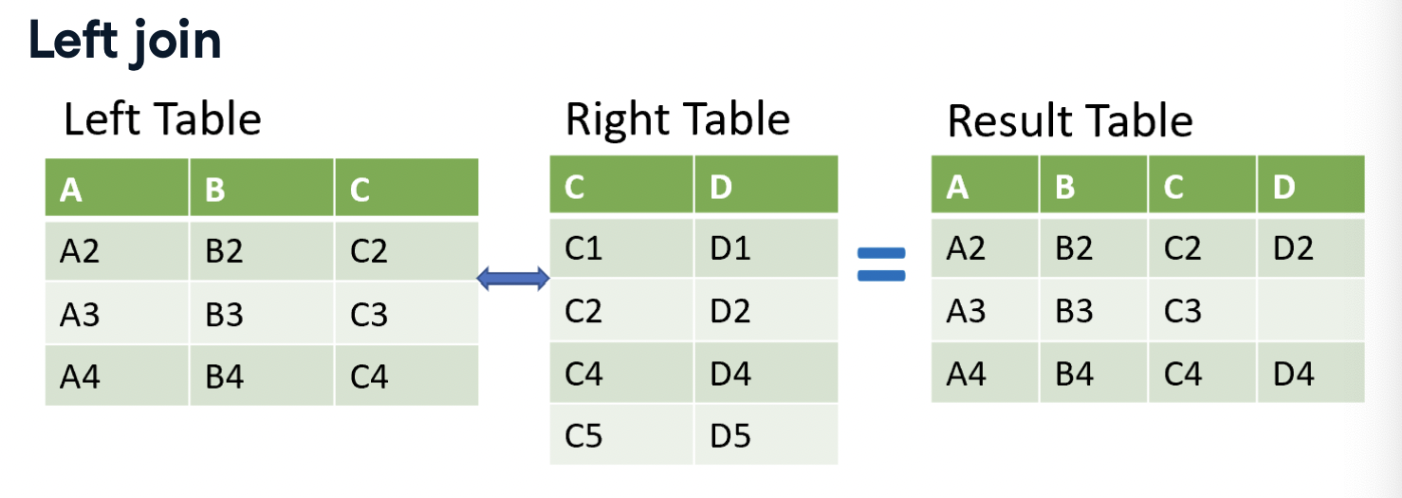

In [123]:
c1 = ['CustomerID', 'Study level', 'Age']
d1 = []
for i in range(10):
    d1.append([i+1, np.random.randint(0,6), np.random.randint(18,70)])
cust_df1 = pd.DataFrame(d1, columns=c1)

In [124]:
cust_df1

,CustomerID,Study level,Age
0,1,1,26
1,2,2,51
2,3,5,38
3,4,0,38
4,5,0,55
5,6,0,46
6,7,4,62
7,8,0,50
8,9,0,57
9,10,5,24


In [125]:
cust_df1_left_join = cust_df1.merge(df, on='CustomerID', how='left')

In [126]:
cust_df1_left_join

,CustomerID,Study level,Age_x,Gender,Age_y,Annual Income (k$),Spending Score (1-100)
0,1,1,26,Male,19,15,39
1,2,2,51,Male,21,15,81
2,3,5,38,Female,20,16,6
3,4,0,38,Female,23,16,77
4,5,0,55,Female,31,17,40
5,6,0,46,Female,22,17,76
6,7,4,62,Female,35,18,6
7,8,0,50,Female,23,18,94
8,9,0,57,Male,64,19,3
9,10,5,24,Female,30,19,72


In [127]:
df1_left_join = df.merge(cust_df1, on='CustomerID', how='left')

In [128]:
df1_left_join

,CustomerID,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y
0,1,Male,19,15,39,1.0,26.0
1,2,Male,21,15,81,2.0,51.0
2,3,Female,20,16,6,5.0,38.0
3,4,Female,23,16,77,0.0,38.0
4,5,Female,31,17,40,0.0,55.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN,NaN
196,197,Female,45,126,28,NaN,NaN
197,198,Male,32,126,74,NaN,NaN
198,199,Male,32,137,18,NaN,NaN


# Right join
### Зеркальный аналог Left join

In [129]:
c2 = ['CustomerID_new', 'Study level', 'Age']
d2 = []
for i in range(10):
    d2.append([i+1, np.random.randint(0,6), np.random.randint(18,70)])

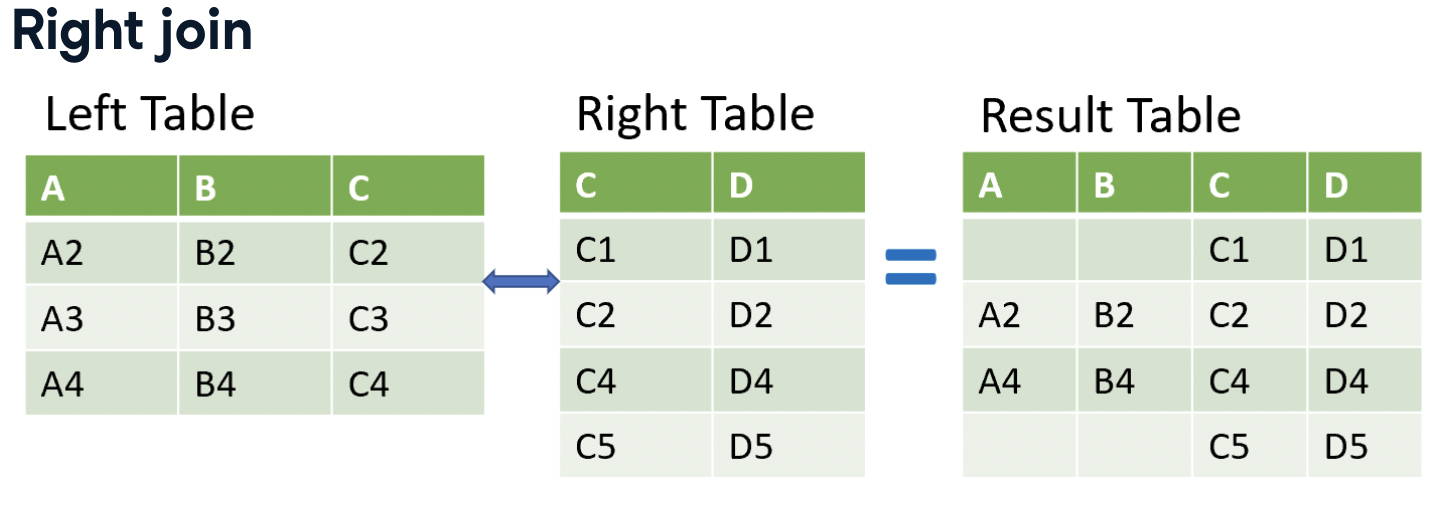

In [130]:
cust_df2 = pd.DataFrame(d2, columns=c2)

In [131]:
cust_df2

,CustomerID_new,Study level,Age
0,1,3,20
1,2,2,22
2,3,1,66
3,4,5,53
4,5,1,37
5,6,0,66
6,7,4,26
7,8,2,56
8,9,5,48
9,10,1,26


In [132]:
cust_df_right_join = df.merge(cust_df2, how='right', left_on='CustomerID',\
                             right_on='CustomerID_new')

In [133]:
cust_df_right_join

,CustomerID,Gender,Age_x,Annual Income (k$),Spending Score (1-100),CustomerID_new,Study level,Age_y
0,1,Male,19,15,39,1,3,20
1,2,Male,21,15,81,2,2,22
2,3,Female,20,16,6,3,1,66
3,4,Female,23,16,77,4,5,53
4,5,Female,31,17,40,5,1,37
5,6,Female,22,17,76,6,0,66
6,7,Female,35,18,6,7,4,26
7,8,Female,23,18,94,8,2,56
8,9,Male,64,19,3,9,5,48
9,10,Female,30,19,72,10,1,26


In [134]:
cust_custdf2_right_join = cust_df2.merge(df, how='right',\
                                       left_on='CustomerID_new',\
                                       right_on='CustomerID')

In [135]:
cust_custdf2_right_join

,CustomerID_new,Study level,Age_x,CustomerID,Gender,Age_y,Annual Income (k$),Spending Score (1-100)
0,1.0,3.0,20.0,1,Male,19,15,39
1,2.0,2.0,22.0,2,Male,21,15,81
2,3.0,1.0,66.0,3,Female,20,16,6
3,4.0,5.0,53.0,4,Female,23,16,77
4,5.0,1.0,37.0,5,Female,31,17,40
...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,196,Female,35,120,79
196,NaN,NaN,NaN,197,Female,45,126,28
197,NaN,NaN,NaN,198,Male,32,126,74
198,NaN,NaN,NaN,199,Male,32,137,18


# Outer join
### Возвращаются все строки обеих таблиц независимо от совпадения между таблицами

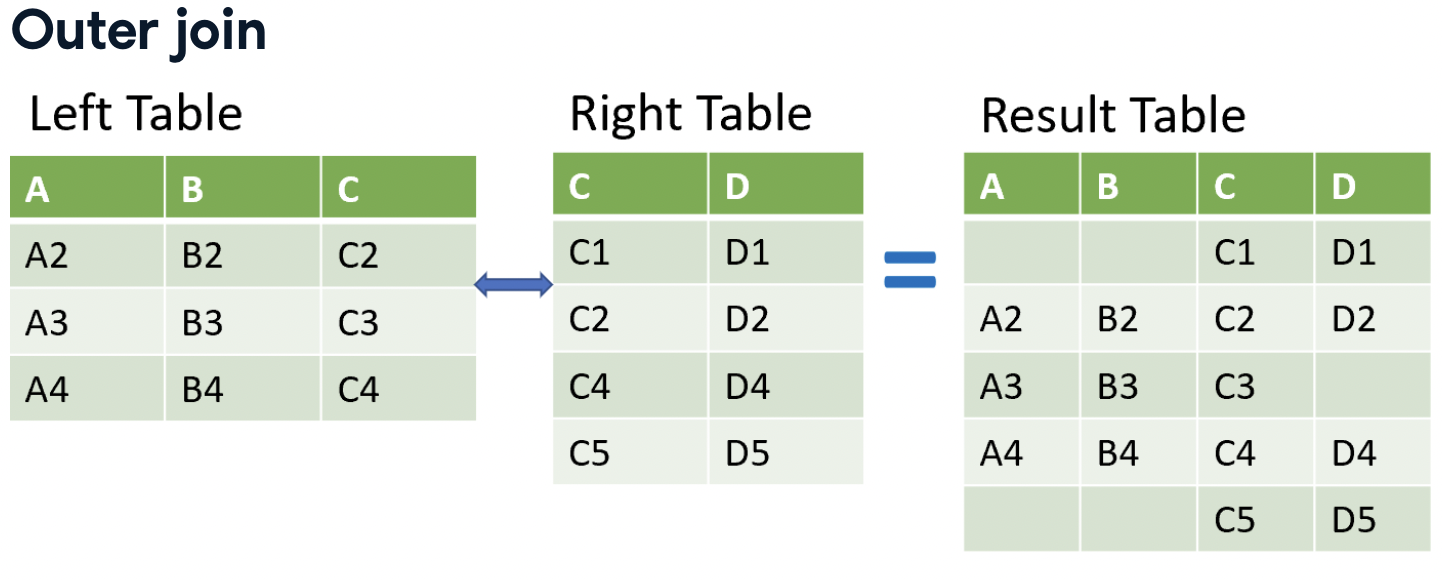

In [136]:
c3, c4 = ['movie_id', 'genre'], ['movie_id', 'genre']
d3, d4 = [], []
for i in range(3):
    d3.append([np.random.randint(0,100), 'Family'])
    d4.append([np.random.randint(0,100), 'Comedy'])
movies1, movies2 = pd.DataFrame(d3, columns=c3), pd.DataFrame(d4, columns=c4)

In [137]:
movies1

,movie_id,genre
0,15,Family
1,38,Family
2,26,Family


In [138]:
movies2

,movie_id,genre
0,95,Comedy
1,38,Comedy
2,93,Comedy


In [139]:
fam_com = movies1.merge(movies2, on='movie_id', how='outer',\
                       suffixes=['_fam', '_com'])
fam_com

,movie_id,genre_fam,genre_com
0,15,Family,NaN
1,38,Family,Comedy
2,26,Family,NaN
3,95,NaN,Comedy
4,93,NaN,Comedy


In [140]:
family_only = fam_com[fam_com['genre_com'].isnull()]

In [141]:
family_only

,movie_id,genre_fam,genre_com
0,15,Family,NaN
2,26,Family,NaN


# Self join

In [142]:
head = ['id', 'title', 'sequel']
data = [
    [19995, 'Avatar', None],
    [862, 'Toy Story', 863],
    [863, 'Toy Story 2', 10193],
    [597, 'Titanic', None],
    [10193, 'Toy Story 3', None]
]
df = pd.DataFrame(data, columns=head)

In [143]:
df

,id,title,sequel
0,19995,Avatar,NaN
1,862,Toy Story,863.0
2,863,Toy Story 2,10193.0
3,597,Titanic,NaN
4,10193,Toy Story 3,NaN


In [144]:
df_sequels = df.merge(df, left_on='sequel', right_on='id',
                     suffixes=['_org', '_seq'])

In [145]:
df_sequels

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863.0,863,Toy Story 2,10193.0
1,863,Toy Story 2,10193.0,10193,Toy Story 3,NaN


In [146]:
df_sequels = df.merge(df, left_on='sequel', right_on='id',
                     suffixes=['_org', '_seq'], how='left')

In [147]:
df_sequels

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,NaN,NaN,NaN,NaN
1,862,Toy Story,863.0,863.0,Toy Story 2,10193.0
2,863,Toy Story 2,10193.0,10193.0,Toy Story 3,NaN
3,597,Titanic,NaN,NaN,NaN,NaN
4,10193,Toy Story 3,NaN,NaN,NaN,NaN


In [148]:
df = pd.read_csv('customers.csv')
bool_filter = ((df['Age'] >= 30) 
               & (df['Annual Income (k$)'] 
                  == df['Annual Income (k$)'].max()))

In [149]:
df[bool_filter]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [150]:
df[(df.Age >= 30) & (df.Gender == 'Male')]['Annual Income (k$)'].max()

137

# Merging on indexes

In [151]:
cust_df = cust_df.set_index('CustomerID')

In [152]:
df = pd.read_csv('customers.csv', index_col=['CustomerID'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [153]:
df_cust_merged_indexes = df.merge(cust_df, on='CustomerID',
                                 how='left')
# for join with more than 1 index use 
#list of indexes like on=['x', 'y']

In [154]:
df_cust_merged_indexes

,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y
CustomerID,,,,,,
1,Male,19,15,39,4,66
2,Male,21,15,81,1,60
3,Female,20,16,6,2,35
4,Female,23,16,77,1,18
5,Female,31,17,40,0,60
...,...,...,...,...,...,...
196,Female,35,120,79,4,30
197,Female,45,126,28,2,22
198,Male,32,126,74,3,58


In [155]:
cust_df = cust_df.reset_index()

In [156]:
cust_df['id'] = cust_df['CustomerID']

In [157]:
cust_df

,CustomerID,Study level,Age,id
0,1,4,66,1
1,2,1,60,2
2,3,2,35,3
3,4,1,18,4
4,5,0,60,5
...,...,...,...,...
195,196,4,30,196
196,197,2,22,197
197,198,3,58,198
198,199,5,66,199


In [158]:
cust_df = cust_df.set_index('id')

In [159]:
df_merge_different_indexes = df.merge(cust_df, 
            left_on='CustomerID',
            right_on='id')

In [160]:
df_merge_different_indexes

,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y
CustomerID,,,,,,
1,Male,19,15,39,4,66
2,Male,21,15,81,1,60
3,Female,20,16,6,2,35
4,Female,23,16,77,1,18
5,Female,31,17,40,0,60
...,...,...,...,...,...,...
196,Female,35,120,79,4,30
197,Female,45,126,28,2,22
198,Male,32,126,74,3,58


# Filtering joins

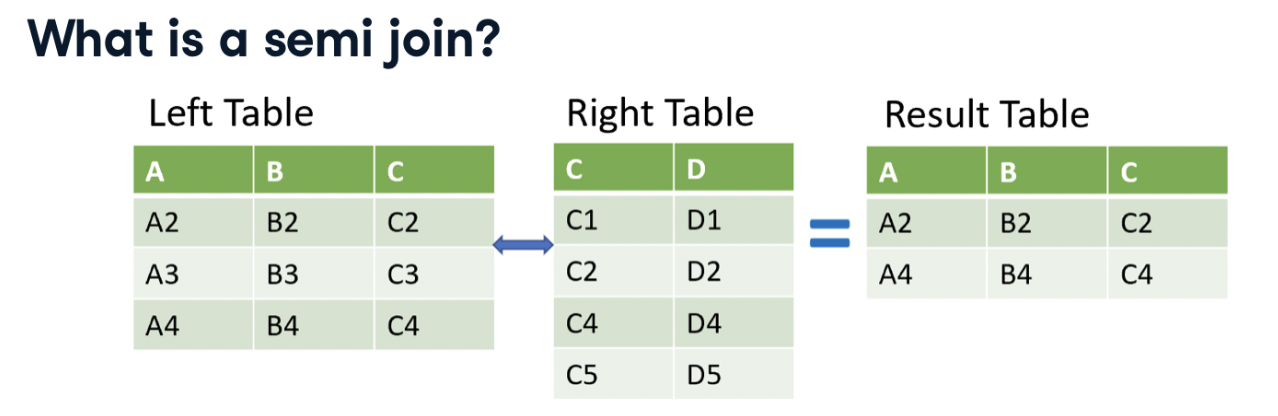

In [161]:
c1 = ['CustomerID', 'Study level', 'Age']
d1 = []
for i in range(10):
    d1.append([i+1, np.random.randint(0,6), np.random.randint(18,70)])
cust_df1 = pd.DataFrame(d1, columns=c1)

In [162]:
df = pd.read_csv('customers.csv')

In [163]:
df_merged = df.merge(cust_df1, on='CustomerID')

In [164]:
df_merged

,CustomerID,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y
0,1,Male,19,15,39,2,54
1,2,Male,21,15,81,2,33
2,3,Female,20,16,6,3,29
3,4,Female,23,16,77,4,68
4,5,Female,31,17,40,4,26
5,6,Female,22,17,76,5,69
6,7,Female,35,18,6,3,61
7,8,Female,23,18,94,4,53
8,9,Male,64,19,3,4,60
9,10,Female,30,19,72,2,40


In [165]:
df["CustomerID"].isin(cust_df1['CustomerID'])

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: CustomerID, Length: 200, dtype: bool

In [166]:
df_filter_semi = df[df["CustomerID"].isin(cust_df1['CustomerID'])]

In [167]:
df_filter_semi

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Anti join

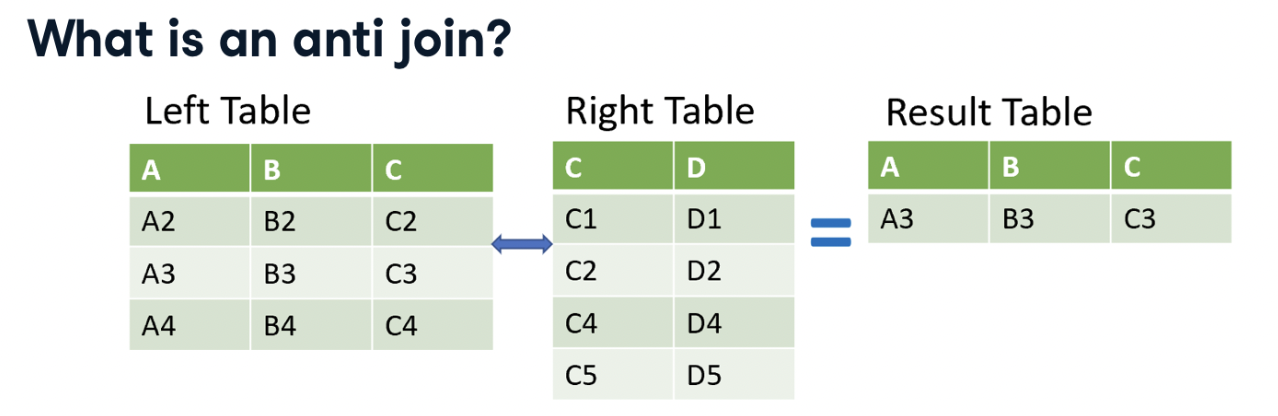

In [168]:
df_filter_anti = df.merge(cust_df1, on='CustomerID', how='left', 
                          indicator=True)

In [169]:
df_filter_anti

,CustomerID,Gender,Age_x,Annual Income (k$),Spending Score (1-100),Study level,Age_y,_merge
0,1,Male,19,15,39,2.0,54.0,both
1,2,Male,21,15,81,2.0,33.0,both
2,3,Female,20,16,6,3.0,29.0,both
3,4,Female,23,16,77,4.0,68.0,both
4,5,Female,31,17,40,4.0,26.0,both
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN,NaN,left_only
196,197,Female,45,126,28,NaN,NaN,left_only
197,198,Male,32,126,74,NaN,NaN,left_only
198,199,Male,32,137,18,NaN,NaN,left_only


In [170]:
anti_filter = df_filter_anti.loc[df_filter_anti['_merge'] == 'left_only', 'CustomerID']

In [171]:
anti_filter

10      11
11      12
12      13
13      14
14      15
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 190, dtype: int64

In [172]:
df_filter_anti = df[df['CustomerID'].isin(anti_filter)]

In [173]:
df_filter_anti

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
10,11,Male,67,19,14
11,12,Female,35,19,99
12,13,Female,58,20,15
13,14,Female,24,20,77
14,15,Male,37,20,13
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [174]:
df_merge_different_indexes.groupby('Study level').agg({'Annual Income (k$)': 'count'})

,Annual Income (k$)
Study level,
0,33
1,32
2,42
3,32
4,30
5,31


# Concatenate DataFrames together vertically

In [175]:
head = ['a', 'b', 'c']
data = []
data1 = []
for i in range(3):
    data.append(['a' + str(i+1), 'b' + str(i+1), 'c' + str(i+1)])
    data1.append(['a' + str(i+4), 'b' + str(i+4), 'c' + str(i+4)])
df_concatenate, df_concatenate1 = pd.DataFrame(data, columns=head),\
pd.DataFrame(data1, columns=head)

In [176]:
df_concatenate

,a,b,c
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3


In [177]:
df_concatenate1

,a,b,c
0,a4,b4,c4
1,a5,b5,c5
2,a6,b6,c6


In [178]:
pd.concat([df_concatenate, df_concatenate1], ignore_index=True,
         keys=['first', 'second'])

,a,b,c
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
3,a4,b4,c4
4,a5,b5,c5
5,a6,b6,c6


In [179]:
vert_conc = pd.concat([df_concatenate, df_concatenate1],
                      ignore_index=False, keys=['first', 'second'])

In [180]:
vert_conc

a   b   c
first  0  a1  b1  c1
       1  a2  b2  c2
       2  a3  b3  c3
second 0  a4  b4  c4
       1  a5  b5  c5
       2  a6  b6  c6

In [181]:
df_concatenate1['d'] = 'd'

In [182]:
pd.concat([df_concatenate, df_concatenate1], sort=True)

,a,b,c,d
0,a1,b1,c1,NaN
1,a2,b2,c2,NaN
2,a3,b3,c3,NaN
0,a4,b4,c4,d
1,a5,b5,c5,d
2,a6,b6,c6,d


In [183]:
pd.concat([df_concatenate, df_concatenate1], join='inner') 
#default join='outer'

,a,b,c
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
0,a4,b4,c4
1,a5,b5,c5
2,a6,b6,c6


In [184]:
df_concatenate.append(df_concatenate1, ignore_index=True, sort=True)

,a,b,c,d
0,a1,b1,c1,NaN
1,a2,b2,c2,NaN
2,a3,b3,c3,NaN
3,a4,b4,c4,d
4,a5,b5,c5,d
5,a6,b6,c6,d


# Verifying integrity

In [185]:
head = ['tid', 'name', 'aid', 'u_price']
data = [
    [2, 'Name1', 3, 1.99],
    [3, 'Name2', 2, 1.99],
    [4, 'Name3', 3, 1.99]
]
df1 = pd.DataFrame(data, columns=head)

In [186]:
head = ['tid', 'ms', 'bytes']
data = [
    [2, 342562, 5510424],
    [3, 230619, 3990994],
    [2, 252051, 4331779]
]
df2 = pd.DataFrame(data, columns=head)

In [187]:
df1

,tid,name,aid,u_price
0,2,Name1,3,1.99
1,3,Name2,2,1.99
2,4,Name3,3,1.99


In [188]:
df2

,tid,ms,bytes
0,2,342562,5510424
1,3,230619,3990994
2,2,252051,4331779


In [189]:
df1.merge(df2, on='tid', validate='one_to_one') 
# will error cause of relation one to many(2 value 2 in 2 table)

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [190]:
df1.merge(df2, on='tid', validate='one_to_many')

,tid,name,aid,u_price,ms,bytes
0,2,Name1,3,1.99,342562,5510424
1,2,Name1,3,1.99,252051,4331779
2,3,Name2,2,1.99,230619,3990994


.concat() check indexes, so df ,ust be indexed

In [191]:
df1 = df1.set_index('tid')

In [192]:
df2 = df2.set_index('tid')

In [193]:
df1

,name,aid,u_price
tid,,,
2,Name1,3,1.99
3,Name2,2,1.99
4,Name3,3,1.99


In [194]:
df2

,ms,bytes
tid,,
2,342562,5510424
3,230619,3990994
2,252051,4331779


In [195]:
pd.concat([df1, df2], verify_integrity=True)
# will error cause have equal indexes in both table 2 and 3
# in first and 2 and 3 in second

ValueError: Indexes have overlapping values: Int64Index([2, 3], dtype='int64', name='tid')

In [196]:
pd.concat([df1, df2], verify_integrity=False)

,name,aid,u_price,ms,bytes
tid,,,,,
2,Name1,3.0,1.99,NaN,NaN
3,Name2,2.0,1.99,NaN,NaN
4,Name3,3.0,1.99,NaN,NaN
2,NaN,NaN,NaN,342562.0,5510424.0
3,NaN,NaN,NaN,230619.0,3990994.0
2,NaN,NaN,NaN,252051.0,4331779.0


# Merging ordered and Time-series Data

### Using merge_ordered( )

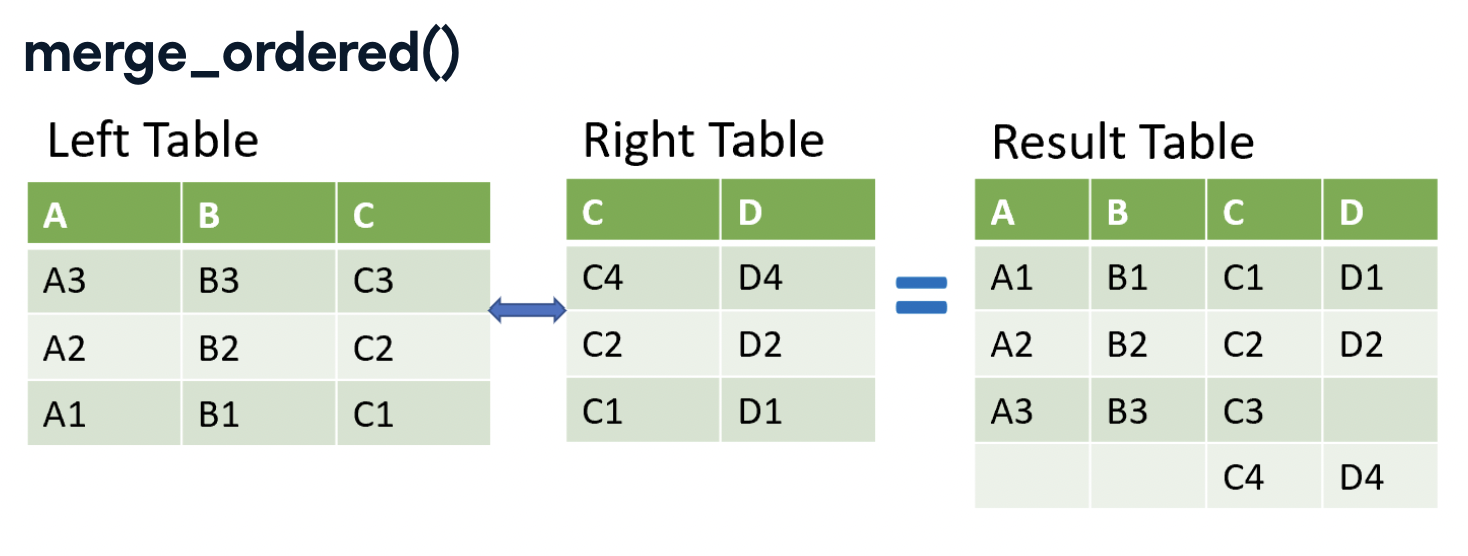

In [197]:
head = ['date', 'close']
data1 = [
    ['2007-02-01', 12.087143],
    ['2007-03-01', 13.272857],
    ['2007-04-01', 14.257143],
    ['2007-05-01', 17.312857],
    ['2007-06-01', 17.434286],
]
data2 = [
    ['2007-01-01', 44.349998],
    ['2007-02-01', 43.689999],
    ['2007-03-01', 45.049999],
    ['2007-04-01', 48.279999],
    ['2007-05-01', 50.549999],
]
df1, df2 = pd.DataFrame(data1, columns=head),pd.DataFrame(data2, columns=head)

In [198]:
df1

,date,close
0,2007-02-01,12.087143
1,2007-03-01,13.272857
2,2007-04-01,14.257143
3,2007-05-01,17.312857
4,2007-06-01,17.434286


In [199]:
df2

,date,close
0,2007-01-01,44.349998
1,2007-02-01,43.689999
2,2007-03-01,45.049999
3,2007-04-01,48.279999
4,2007-05-01,50.549999


In [200]:
pd.merge_ordered(df1, df2, on='date', suffixes=['_df1', '_df2'])

,date,close_df1,close_df2
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-03-01,13.272857,45.049999
3,2007-04-01,14.257143,48.279999
4,2007-05-01,17.312857,50.549999
5,2007-06-01,17.434286,NaN


In [201]:
pd.merge_ordered(df1, df2, on='date', suffixes=['_df1', '_df2'],
                fill_method='ffill')

,date,close_df1,close_df2
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-03-01,13.272857,45.049999
3,2007-04-01,14.257143,48.279999
4,2007-05-01,17.312857,50.549999
5,2007-06-01,17.434286,50.549999


### Using merge_asof( )

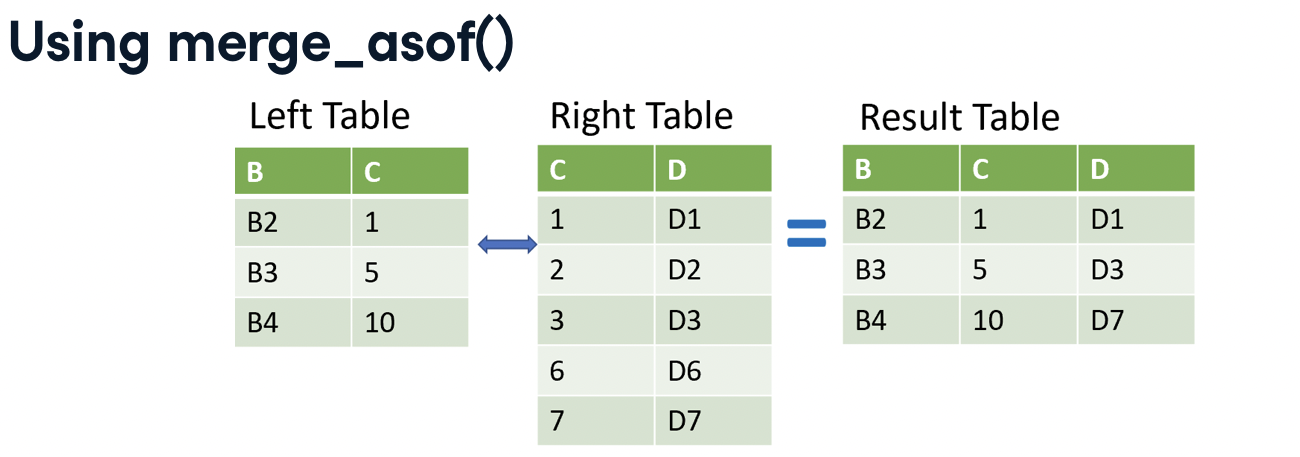

In [202]:
head = ['date_time', 'close']
data1 = [
    ['2017-11-17 16:00:00', 110.32],
    ['2017-11-17 17:00:00', 110.24],
    ['2017-11-17 18:00:00', 110.065],
    ['2017-11-17 19:00:00', 110.04],
    ['2017-11-17 20:00:00', 110.0],
    ['2017-11-17 21:00:00', 109.9966],
    ['2017-11-17 22:00:00', 109.82]
]
data2 = [
    ['2017-11-17 15:35:12', 149.3],
    ['2017-11-17 15:40:34', 149.13],
    ['2017-11-17 15:45:50', 148.98],
    ['2017-11-17 15:50:20', 148.99],
    ['2017-11-17 15:55:10', 149.11],
    ['2017-11-17 16:00:03', 149.25],
    ['2017-11-17 16:05:06', 149.5175],
    ['2017-11-17 16:10:12', 149.57],
    ['2017-11-17 16:15:30', 149.59],
    ['2017-11-17 16:20:32', 149.82],
]
df1, df2 = pd.DataFrame(data1, columns=head),pd.DataFrame(data2, columns=head)

In [203]:
df1

,date_time,close
0,2017-11-17 16:00:00,110.3200
1,2017-11-17 17:00:00,110.2400
2,2017-11-17 18:00:00,110.0650
3,2017-11-17 19:00:00,110.0400
4,2017-11-17 20:00:00,110.0000
5,2017-11-17 21:00:00,109.9966
6,2017-11-17 22:00:00,109.8200


In [204]:
df2

,date_time,close
0,2017-11-17 15:35:12,149.3000
1,2017-11-17 15:40:34,149.1300
2,2017-11-17 15:45:50,148.9800
3,2017-11-17 15:50:20,148.9900
4,2017-11-17 15:55:10,149.1100
5,2017-11-17 16:00:03,149.2500
6,2017-11-17 16:05:06,149.5175
7,2017-11-17 16:10:12,149.5700
8,2017-11-17 16:15:30,149.5900
9,2017-11-17 16:20:32,149.8200


Errors so read anythere

### Selecting data with .query( )

In [205]:
df2

,date_time,close
0,2017-11-17 15:35:12,149.3000
1,2017-11-17 15:40:34,149.1300
2,2017-11-17 15:45:50,148.9800
3,2017-11-17 15:50:20,148.9900
4,2017-11-17 15:55:10,149.1100
5,2017-11-17 16:00:03,149.2500
6,2017-11-17 16:05:06,149.5175
7,2017-11-17 16:10:12,149.5700
8,2017-11-17 16:15:30,149.5900
9,2017-11-17 16:20:32,149.8200


In [206]:
df2.query('close >= 149')

,date_time,close
0,2017-11-17 15:35:12,149.3000
1,2017-11-17 15:40:34,149.1300
4,2017-11-17 15:55:10,149.1100
5,2017-11-17 16:00:03,149.2500
6,2017-11-17 16:05:06,149.5175
7,2017-11-17 16:10:12,149.5700
8,2017-11-17 16:15:30,149.5900
9,2017-11-17 16:20:32,149.8200


In [207]:
df2.query('close >=149 and close <= 149.13')

,date_time,close
1,2017-11-17 15:40:34,149.13
4,2017-11-17 15:55:10,149.11


In [208]:
df2.query('close == 149.11 or close == "lol"')

,date_time,close
4,2017-11-17 15:55:10,149.11


### Reshaping data with.melt( )

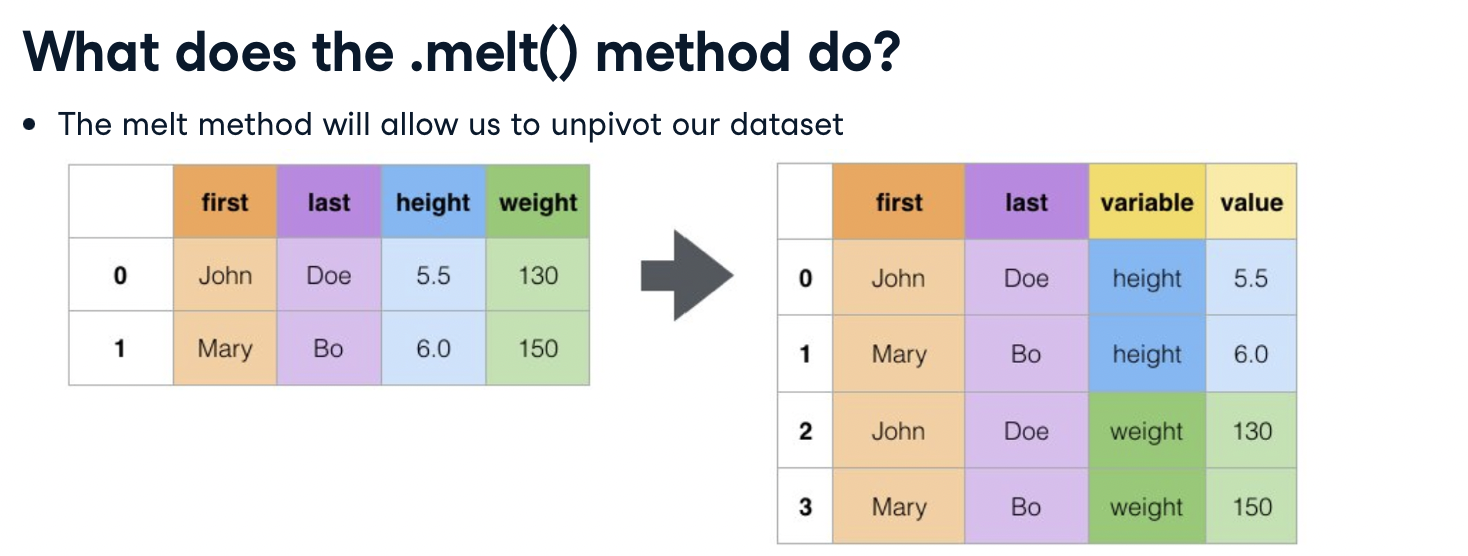

In [209]:
head = ['fin', 'comp', 2019, 2018, 2017]
data = [
    ['total', 'twitter', 1234, 1222, 1123],
    ['gross', 'twitter', 1092, 983, 1001],
    ['total', 'facebook', 12333, 12432, 11999],
    ['gross', 'facebook', 11345, 11222, 11003]
]
df = pd.DataFrame(data, columns=head)
df

,fin,comp,2019,2018,2017
0,total,twitter,1234,1222,1123
1,gross,twitter,1092,983,1001
2,total,facebook,12333,12432,11999
3,gross,facebook,11345,11222,11003


In [210]:
df_tall = df.melt(id_vars=['fin', 'comp'])
df_tall

,fin,comp,variable,value
0,total,twitter,2019,1234
1,gross,twitter,2019,1092
2,total,facebook,2019,12333
3,gross,facebook,2019,11345
4,total,twitter,2018,1222
5,gross,twitter,2018,983
6,total,facebook,2018,12432
7,gross,facebook,2018,11222
8,total,twitter,2017,1123
9,gross,twitter,2017,1001


In [211]:
df_tall = df.melt(id_vars=['fin', 'comp'],
                 value_vars=[2019, 2018])
df_tall

,fin,comp,variable,value
0,total,twitter,2019,1234
1,gross,twitter,2019,1092
2,total,facebook,2019,12333
3,gross,facebook,2019,11345
4,total,twitter,2018,1222
5,gross,twitter,2018,983
6,total,facebook,2018,12432
7,gross,facebook,2018,11222


In [213]:
df_tall = df.melt(id_vars=['fin', 'comp'],
                 value_vars=[2019, 2018],
                 var_name='year',
                 value_name='dollars')
df_tall

,fin,comp,year,dollars
0,total,twitter,2019,1234
1,gross,twitter,2019,1092
2,total,facebook,2019,12333
3,gross,facebook,2019,11345
4,total,twitter,2018,1222
5,gross,twitter,2018,983
6,total,facebook,2018,12432
7,gross,facebook,2018,11222
